In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [72]:
import sklearn
from sklearn import datasets
import pandas as pd

Классификация дефектов стальных пластин, классифицированных по 7 различным типам:

In [73]:
data = datasets.fetch_openml(name='steel-plates-fault', version=1, parser='auto', data_home='datasets', 
                          as_frame=True)  

In [74]:
data.DESCR

"**Author**: Semeion, Research Center of Sciences of Communication, Rome, Italy.     \n**Source**: [UCI](http://archive.ics.uci.edu/ml/datasets/steel+plates+faults)     \n**Please cite**: Dataset provided by Semeion, Research Center of Sciences of Communication, Via Sersale 117, 00128, Rome, Italy.  \n\n**Steel Plates Faults Data Set**  \nA dataset of steel plates' faults, classified into 7 different types. The goal was to train machine learning for automatic pattern recognition.\n\nThe dataset consists of 27 features describing each fault (location, size, ...) and 7 binary features indicating the type of fault (on of 7: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults). The latter is commonly used as a binary classification target ('common' or 'other' fault.)\n\n### Attribute Information  \n* V1: X_Minimum  \n* V2: X_Maximum  \n* V3: Y_Minimum  \n* V4: Y_Maximum  \n* V5: Pixels_Areas  \n* V6: X_Perimeter  \n* V7: Y_Perimeter  \n* V8: Sum_of_Luminosity  \n* V9: Minim

In [75]:
X=data.data
# удалим самые информативные признаки, чтобы было интереснее
X = X.drop([f'V{i}' for i in range(28,34)], axis=1)  

Y=data.target

In [76]:
Y.unique()

['1', '2']
Categories (2, object): ['1', '2']

In [77]:
Y=Y.cat.rename_categories([0,1]).astype(int)

In [78]:
Y.unique()

array([0, 1])

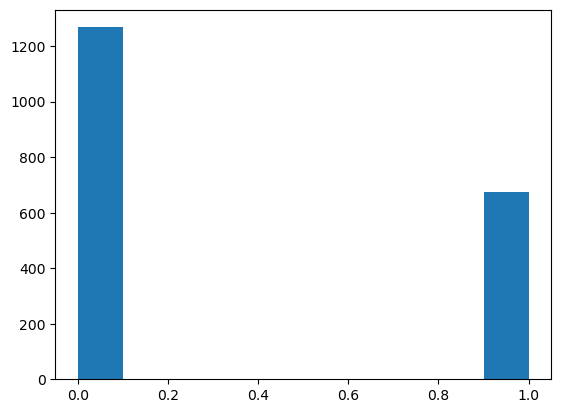

In [79]:
Y.hist(grid=False);

In [80]:
Z=X.copy()
Z['Y']=Y

In [81]:
len(Z)

1941

In [82]:
Z['Y'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64

In [83]:
Z['Y'].tail(5)

1936    1
1937    1
1938    1
1939    1
1940    1
Name: Y, dtype: int64

In [84]:
np.random.seed(0)
Z = Z.sample(frac=1).reset_index(drop=True)

In [85]:
Z['Y'].head(7)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: Y, dtype: int64

In [86]:
Z['Y'].tail(7)

1934    1
1935    0
1936    0
1937    0
1938    1
1939    0
1940    0
Name: Y, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

Z_train, Z_test = train_test_split(Z, test_size=0.4, shuffle=True, random_state=0, stratify=Z['Y'])   # разделим в на обучение/тест в заданной пропорции

len(Z), len(Z_train), len(Z_test)

(1941, 1164, 777)

In [88]:
def XY_split(Z):
    '''Функция разбиения по признаки и отклики'''
    Y = Z['Y']
    X = Z.copy()
    X = X.drop('Y',axis=1)
    return X,Y

X_train, Y_train = XY_split(Z_train)
X_test, Y_test = XY_split(Z_test)

# Анализ данных

In [89]:
Y.value_counts()

Class
0    1268
1     673
Name: count, dtype: int64

In [90]:
Y.describe()

count    1941.000000
mean        0.346728
std         0.476051
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Class, dtype: float64

In [91]:
Y.head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Class, Length: 100, dtype: int64

In [92]:
(Y==0).sum(), (Y==1).sum()

(1268, 673)

In [93]:
Z

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,Y
0,805,813,273908,273912,16,8,4,2121,114,148,...,1.0000,1.0000,0.0,1.2041,0.9031,0.6021,-0.5000,0.0356,0.1417,0
1,41,209,4401486,4401544,5533,288,155,584291,43,126,...,0.5833,0.3742,0.0,3.7430,2.2253,1.7634,-0.6548,-0.1750,1.0000,0
2,1,250,115072,115195,15650,943,539,1732196,23,140,...,0.2641,0.2282,0.0,4.1945,2.3962,2.0899,-0.5060,-0.1353,1.0000,0
3,244,275,923170,923211,709,84,55,83627,105,132,...,0.3690,0.7455,1.0,2.8507,1.4914,1.6128,0.2439,-0.0785,0.9984,0
4,95,127,961065,961092,551,44,27,53142,56,128,...,0.7273,1.0000,0.0,2.7411,1.5051,1.4314,-0.1563,-0.2465,0.9769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1373,1395,5971611,5971616,68,24,9,8685,115,143,...,0.9167,0.5556,0.0,1.8325,1.3424,0.6990,-0.7727,-0.0022,0.2173,0
1937,1061,1085,3326735,3326756,161,44,39,15643,85,124,...,0.5454,0.5385,0.0,2.2068,1.3802,1.3222,-0.1250,-0.2409,0.7933,0
1938,438,455,627768,627803,415,29,37,45783,82,127,...,0.5862,0.9459,1.0,2.6181,1.2305,1.5441,0.5143,-0.1381,0.8756,1
1939,42,180,388190,388236,4019,191,102,417578,41,125,...,0.7225,0.4510,0.0,3.6041,2.1399,1.6628,-0.6667,-0.1883,1.0000,0


In [94]:
# проверим разброс признаков по std
# а также отсутствие аномально больших и малых значений признаков
X.describe()  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


In [95]:
Z.dtypes

V1       int64
V2       int64
V3       int64
V4       int64
V5       int64
V6       int64
V7       int64
V8       int64
V9       int64
V10      int64
V11      int64
V12      int64
V13      int64
V14      int64
V15    float64
V16    float64
V17    float64
V18    float64
V19    float64
V20    float64
V21    float64
V22    float64
V23    float64
V24    float64
V25    float64
V26    float64
V27    float64
Y        int64
dtype: object

Видим, что разброс признаков сильно различается.

### Разделение на категориальные и вещественные признаки

In [96]:
unique_value_counts = X.apply(lambda s: s.nunique())
unique_value_counts.sort_values()

V13       2
V12       2
V21       3
V14      24
V11      84
V10     100
V9      161
V23     183
V24     217
V7      317
V27     388
V6      399
V18     454
V20     648
V17     770
V19     818
V22     914
V25     918
V5      920
V1      962
V2      994
V16    1338
V15    1387
V26    1522
V8     1909
V3     1939
V4     1940
dtype: int64

In [97]:
X['V21'].unique(), X['V14'].unique()  

(array([1. , 0.5, 0. ]),
 array([ 80, 100, 290, 185,  40, 150, 200,  50,  70, 250,  60,  69, 120,
        211, 143, 220, 175, 125,  90,  85, 300, 180, 130, 140]))

`V21` еще можно считать категориальной величиной, а `V14` - уже нет.

In [98]:
categorical_features = list(unique_value_counts[unique_value_counts<=3].index)
numeric_features = [col for col in X.columns if col not in categorical_features] 

In [99]:
categorical_features

['V12', 'V13', 'V21']

In [100]:
numeric_features

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27']

## Важности признаков

In [101]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50)
model = model.fit(X_train, Y_train)
model.feature_importances_     
# как побочный продукт настройки модели, 
# случайный лес способен определять важности признаков

array([0.04661496, 0.03784049, 0.03802249, 0.05133463, 0.03901305,
       0.02313708, 0.028573  , 0.03879856, 0.03746836, 0.03164644,
       0.04670698, 0.01270961, 0.01334264, 0.09453152, 0.04560671,
       0.04235729, 0.03404178, 0.05049336, 0.02984253, 0.04148865,
       0.00590914, 0.03814962, 0.03711984, 0.024498  , 0.04940013,
       0.03888577, 0.02246737])

In [102]:
sum(model.feature_importances_ )

1.0000000000000002

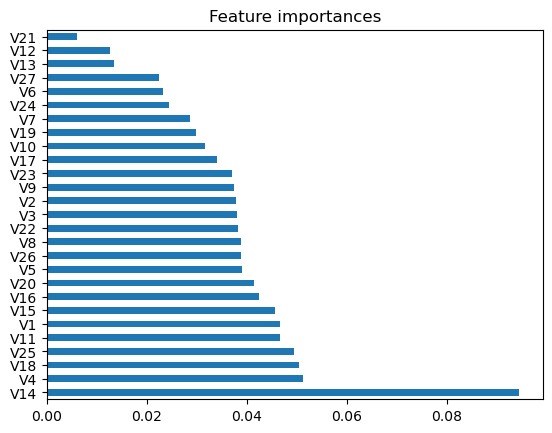

In [32]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(200).plot(kind='barh', title='Feature importances');

Видим, что `V14` (Steel_Plate_Thickness) - самый важный признак.

In [33]:
feat_importances.nlargest(6)

V14    0.094532
V4     0.051335
V18    0.050493
V25    0.049400
V11    0.046707
V1     0.046615
dtype: float64

In [34]:
most_important_features = list(feat_importances.nlargest(6).index)

# Попарные зависимости

In [35]:
import matplotlib as mpl

In [36]:
cmap = mpl.colors.ListedColormap(['r', 'b'])  # 'r' для класса 1; 'b' для класса 2

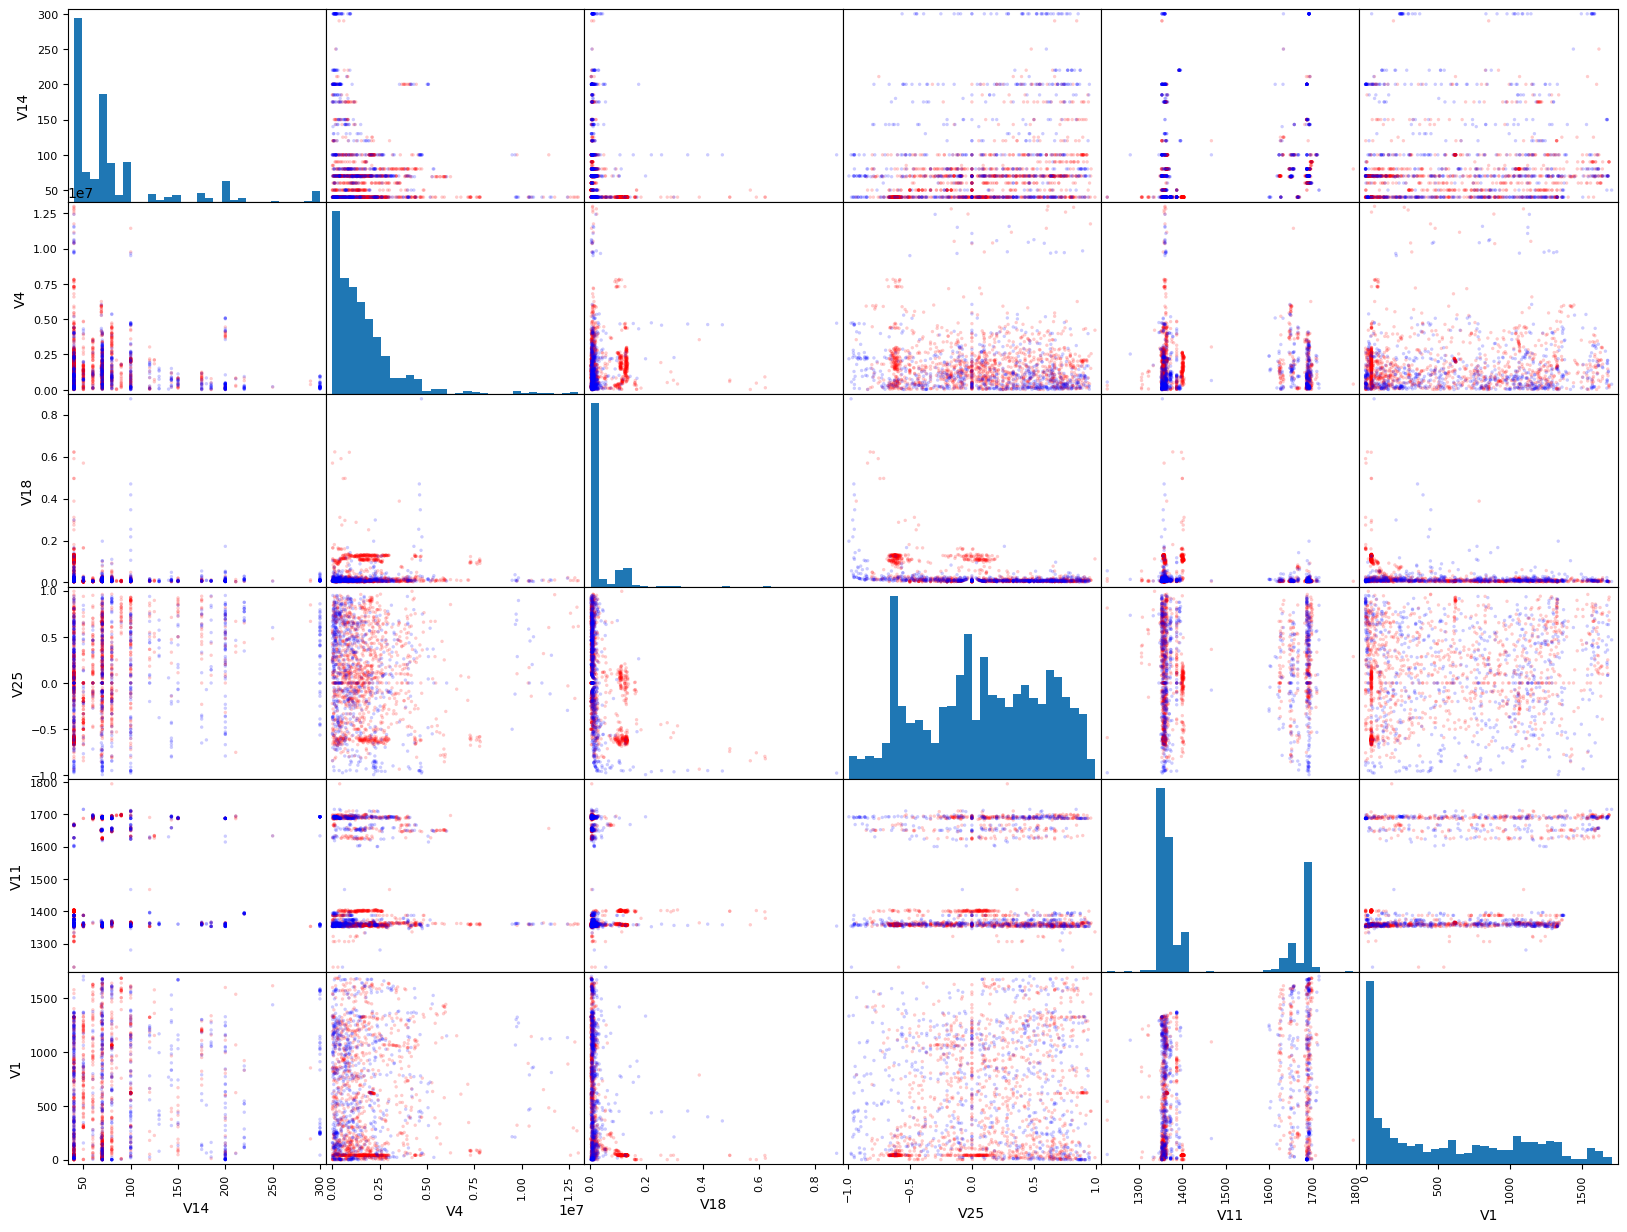

In [37]:
grr = pd.plotting.scatter_matrix(X[most_important_features], c=Y, figsize=(20, 15), marker='o', hist_kwds={'bins': 30}, s=6, alpha=.2, cmap=cmap)  

Видим интересные зависимости между `V1` и `V15`.

## Внутриклассовые распределения признаков и их разности

In [38]:
def plot_class_conditional_univariate_distributions(X,Y):
    classes = Y.unique()
    colors = list('brgkcmy')
    for col in X.columns:
        plt.figure()
        counts, bins, _ = plt.hist([X.loc[Y==cl,col] for cl in classes], color=colors[:len(classes)], label=[f'class {cl}' for cl in classes], density=True)
        counts/=counts.sum(axis=1)[:,None]
        # посчитаем разделимость для каждой пары классов и найдем максимальную
        max_diff = 0
        for c1 in classes:
            for c2 in classes:
                if c1!=c2:
                    diff = np.absolute(counts[c1]-counts[c2]).sum()/2  # /2 чтобы макс. значение было 1, когда распределения полностью отличаются
                    max_diff = max(max_diff, diff)    

        plt.title(f'{col}: max_diff={max_diff:.02f}')
        plt.xlabel('feature')
        plt.ylabel('density')
        plt.legend()
        plt.show()    

### Модельный пример 

In [39]:
Z2=pd.DataFrame({'feature1':[1,1,1,1,2,2,2,2],'feature2':[1,2,1,2,1,2,1,2],'Y':[0,0,0,0,1,1,1,1]})
X2=Z2[['feature1','feature2']]
Y2=Z2['Y']
Z2

,feature1,feature2,Y
0,1,1,0
1,1,2,0
2,1,1,0
3,1,2,0
4,2,1,1
5,2,2,1
6,2,1,1
7,2,2,1


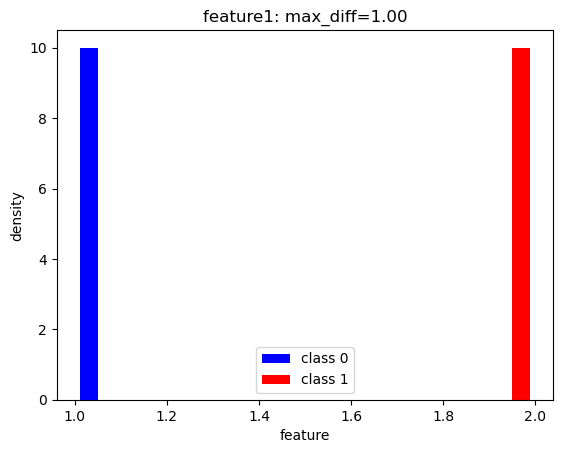

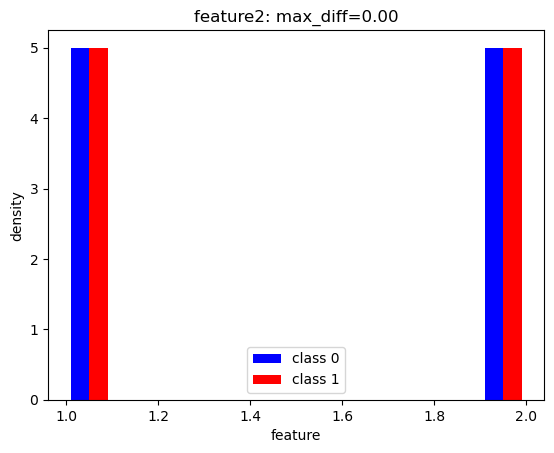

In [40]:
plot_class_conditional_univariate_distributions(X2,Y2)  # модельный пример

### Расчет на реальных данных

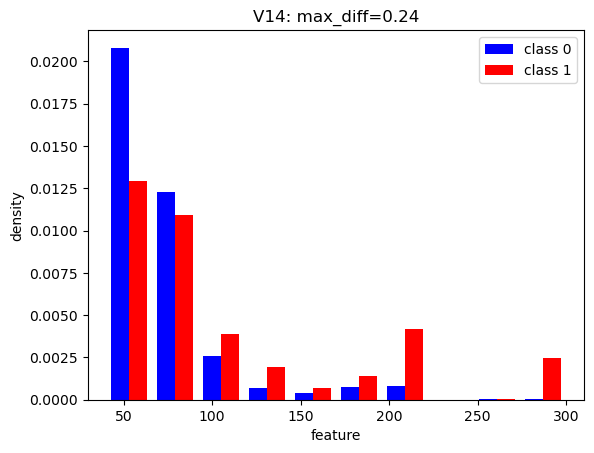

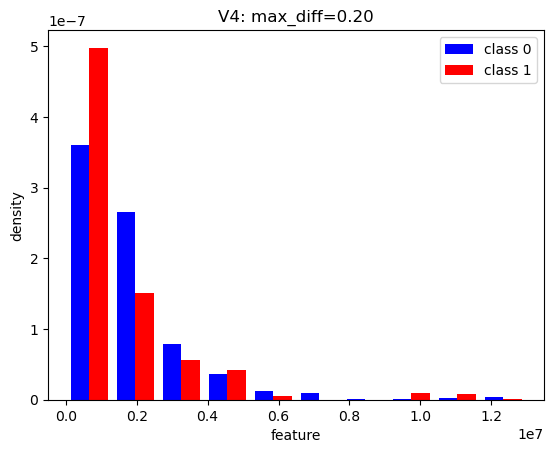

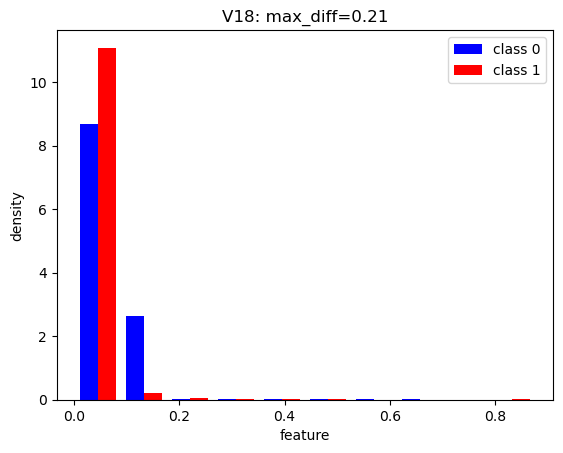

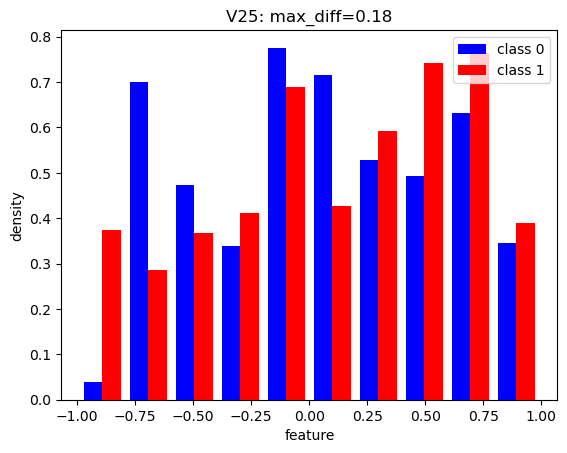

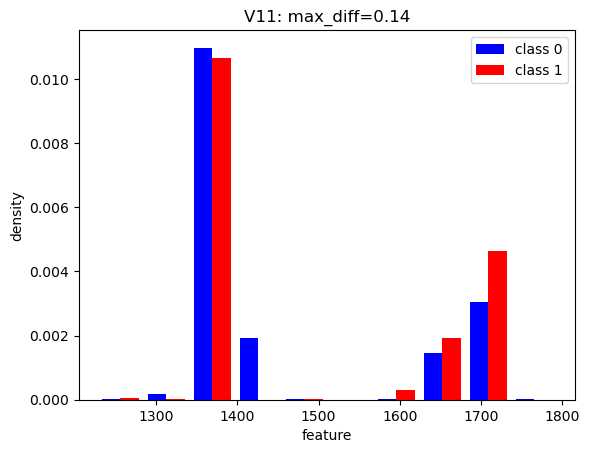

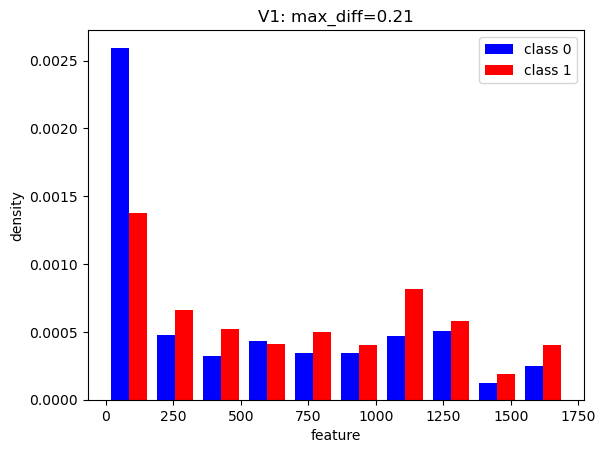

In [41]:
plot_class_conditional_univariate_distributions(X[most_important_features],Y)

# Методы прогнозирования

In [42]:
from sklearn import neighbors
from sklearn import metrics
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

## Метод ближайших центроидов

In [43]:
model = NearestCentroid()
model.fit(X_train,Y_train);
Y_hat = model.predict(X_test)

In [44]:
def show_accuracy(Y_test, Y_hat):
    acc = sklearn.metrics.accuracy_score(Y_test, Y_hat)
    print(f'Accuracy: {acc:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(Y_test, Y_hat)   # матрица счётчиков true_class x predicted_class
    disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot();

Accuracy: 0.56


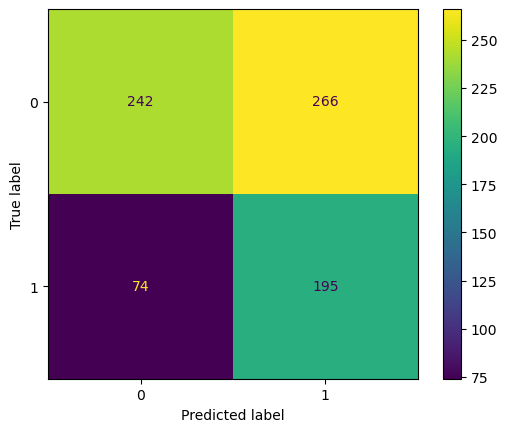

In [45]:
model = sklearn.neighbors.NearestCentroid()
model.fit(X_train,Y_train)
Y_hat = model.predict(X_test)

show_accuracy(Y_test, Y_hat)

Видим, что метод не очень точно работает.

## K ближайших соседей

Accuracy: 0.64


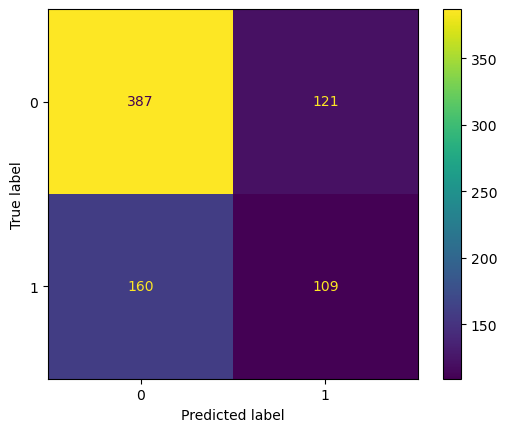

In [46]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_hat = model.predict(X_test)

show_accuracy(Y_test, Y_hat)

In [47]:
model.get_params()  # возвращает текущие параметры модели

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [48]:
search_space = {'n_neighbors':[1,3,5,7,9,11,15,21,31]}

grid_search = GridSearchCV(KNeighborsClassifier(), search_space, scoring='accuracy', refit=True, n_jobs=-1)    # n_jobs=-1: использовать все процессоры, а не один (по умолчанию)

grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 21, 31]},
             scoring='accuracy')

In [49]:
grid_search.cv_results_   # результаты подбора гиперпараметров

{'mean_fit_time': array([0.00536966, 0.00499597, 0.00410762, 0.00414691, 0.0036417 ,
        0.00408497, 0.00378051, 0.00366755, 0.00331516]),
 'std_fit_time': array([0.00141591, 0.00068345, 0.00025612, 0.00069256, 0.00010065,
        0.00013115, 0.00014393, 0.00054267, 0.0001436 ]),
 'mean_score_time': array([0.07252636, 0.05540905, 0.03134017, 0.02891307, 0.02900085,
        0.03065672, 0.02846494, 0.0257875 , 0.02459912]),
 'std_score_time': array([0.01854168, 0.01907406, 0.00095693, 0.00133262, 0.00103737,
        0.00064428, 0.00140986, 0.00208209, 0.00336584]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 15, 21, 31],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 15},
  {'n_neighbors': 21},
  {'n_neighbors': 31}],
 'split0

In [50]:
grid_search.best_params_   # параметры наилучшего метода

{'n_neighbors': 31}

In [51]:
model = KNeighborsClassifier(**grid_search.best_params_)   # инициализация модели наилучшими параметрами
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 31,
 'p': 2,
 'weights': 'uniform'}

Accuracy: 0.67


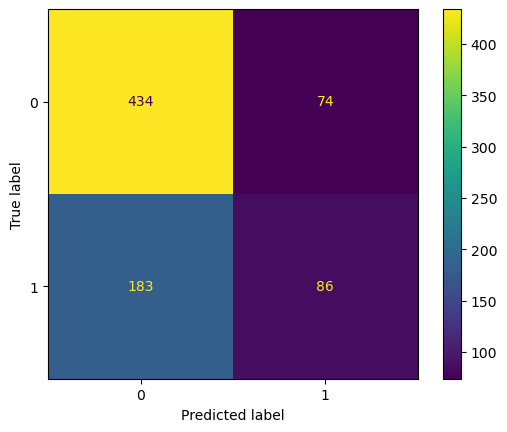

In [52]:
model.fit(X_train, Y_train)
Y_hat = model.predict(X_test)

show_accuracy(Y_test, Y_hat)

Accuracy: 0.67


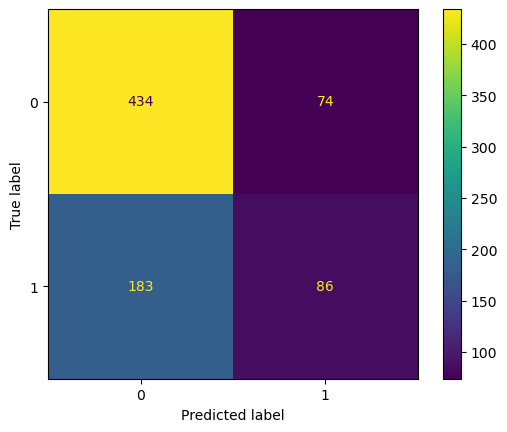

In [53]:
Y_hat = grid_search.predict(X_test)    # можно предсказывать и объектом grid_search, если он был вызван с refit=True (по умолчанию)

show_accuracy(Y_test, Y_hat)

### Интегрируем нормализацию признаков

In [54]:
# создадим конвейер обработки данных
pipe = Pipeline(
    [('norm', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=3))
    ])

pipe.fit(X_train,Y_train)

Pipeline(steps=[('norm', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=3))])

Accuracy: 0.78


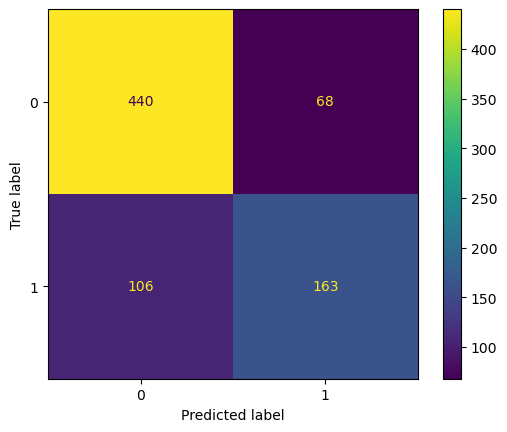

In [55]:
Y_hat = pipe.predict(X_test)

show_accuracy(Y_test, Y_hat)

Точность сразу выше, чем без нормализации признаков.

In [56]:
search_space = {'model__n_neighbors':[1,3,5,7,9,11,15,21,31]}

grid_search = GridSearchCV(pipe, search_space, scoring='accuracy', refit=True, n_jobs=-1)    # n_jobs=-1: использовать все процессоры, а не один (по умолчанию)

grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('norm', StandardScaler()),
                                       ('model',
                                        KNeighborsClassifier(n_neighbors=3))]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': [1, 3, 5, 7, 9, 11, 15, 21, 31]},
             scoring='accuracy')

In [57]:
grid_search.best_params_   # параметры наилучшего метода

{'model__n_neighbors': 1}

Accuracy: 0.77


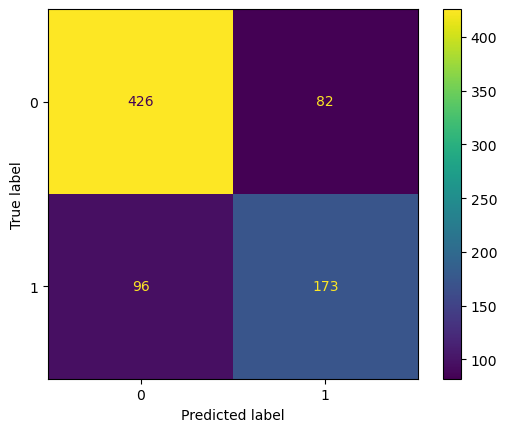

In [58]:
Y_hat = grid_search.predict(X_test)    # можно предсказывать и объектом grid_search, если он был вызван с refit=True (по умолчанию)

show_accuracy(Y_test, Y_hat)

In [59]:
search_space = {'model__n_neighbors':[1,3,5,7,9], 'model__p':np.linspace(1,6,10)}

grid_search = GridSearchCV(pipe, search_space, scoring='accuracy', refit=True, n_jobs=-1)    # n_jobs=-1: использовать все процессоры, а не один (по умолчанию)

grid_search.fit(X_train, Y_train)

/home/apogentus/anaconda3/envs/ml2/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=Pipeline(steps=[('norm', StandardScaler()),
                                       ('model',
                                        KNeighborsClassifier(n_neighbors=3))]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': [1, 3, 5, 7, 9],
                         'model__p': array([1.        , 1.55555556, 2.11111111, 2.66666667, 3.22222222,
       3.77777778, 4.33333333, 4.88888889, 5.44444444, 6.        ])},
             scoring='accuracy')

In [60]:
grid_search.best_params_   # параметры наилучшего метода

{'model__n_neighbors': 3, 'model__p': 2.666666666666667}

Accuracy: 0.78


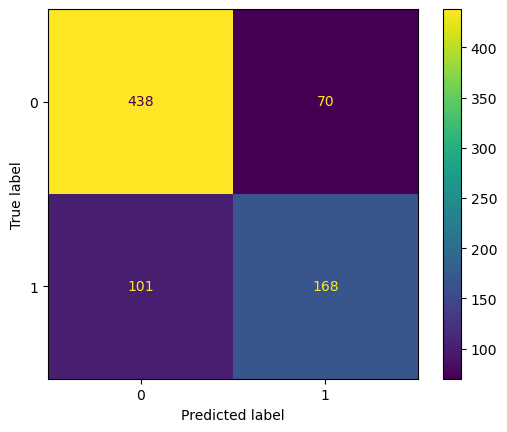

In [61]:
Y_hat = grid_search.predict(X_test)    # можно предсказывать и объектом grid_search, если он был вызван с refit=True (по умолчанию)

show_accuracy(Y_test, Y_hat)

In [62]:
print('Unique values of categorical features:')
for cat in categorical_features:
    print(f'{cat}: {X[cat].unique()}')

Unique values of categorical features:
V12: [1 0]
V13: [0 1]
V21: [1.  0.5 0. ]


In [63]:
numeric_features

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27']

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [65]:
len(X_train), len(Y_train)

(1164, 1164)

In [66]:
# Создадим конвейер обработки данных по разному обрабатывающий вещественные и категориальные признаки.

# Предобработка для вещественных признаков:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),                   # пропуски в вещественных признаках заполним медианой
    ('scaler', StandardScaler())])

# Предобработка для категориальных признаков:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),  # пропуски в категориальных признаках заполним константой -1
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Присоединим раздельный препроцессинг и прогностическую модель
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', KNeighborsClassifier(n_neighbors=3))])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V14', 'V15',
                                                   'V16', 'V17', 'V18', 'V19',
                                                   'V20', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['V12', 'V13', 'V21'])])),
                ('model', KNeighborsClassifier(n_neighbors=3))])

Accuracy: 0.78


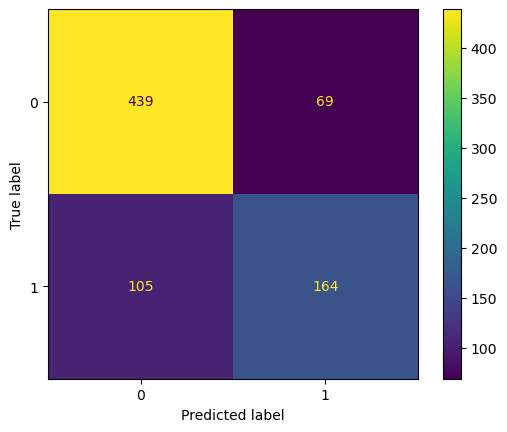

In [67]:
pipe.fit(X_train, Y_train)
Y_hat = pipe.predict(X_test)
show_accuracy(Y_test, Y_hat)

/home/apogentus/anaconda3/envs/ml2/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy: 0.78


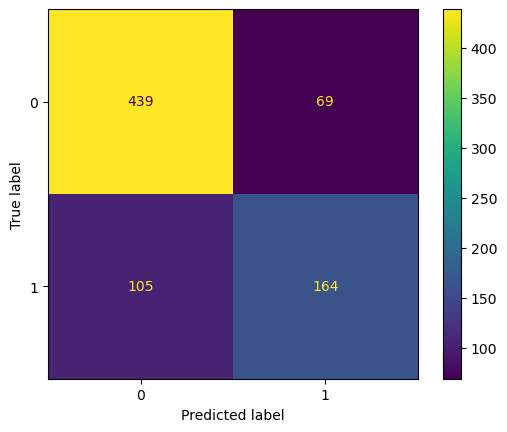

In [68]:
search_space = {'preprocessor__num__imputer__strategy':['mean','median'], 'model__n_neighbors':[3,5,7,9,11,15,21,31]}

grid_search = GridSearchCV(pipe, search_space, scoring='accuracy', refit=True, n_jobs=-1)    # n_jobs=-1: использовать все процессоры, а не один (по умолчанию)

grid_search.fit(X_train, Y_train)
Y_hat = grid_search.predict(X_test)
show_accuracy(Y_test, Y_hat)

In [69]:
grid_search.best_params_

{'model__n_neighbors': 3, 'preprocessor__num__imputer__strategy': 'mean'}

In [70]:
grid_search.cv_results_

{'mean_fit_time': array([0.03779044, 0.04198818, 0.02759247, 0.03172741, 0.03021922,
        0.03089471, 0.02720995, 0.03033061, 0.02845283, 0.03165555,
        0.02604375, 0.03045115, 0.03235283, 0.02901731, 0.02608662,
        0.02553906]),
 'std_fit_time': array([0.00844712, 0.0065295 , 0.0016559 , 0.00178675, 0.00369177,
        0.00085581, 0.00115487, 0.00308066, 0.00317867, 0.00274061,
        0.00049799, 0.00031638, 0.0117837 , 0.00236769, 0.00019351,
        0.00388608]),
 'mean_score_time': array([0.02108884, 0.01784902, 0.01724782, 0.01751194, 0.01904502,
        0.01934195, 0.017558  , 0.01771398, 0.01851892, 0.01829519,
        0.01897397, 0.01882315, 0.01958766, 0.01838741, 0.02098775,
        0.01670656]),
 'std_score_time': array([0.00098168, 0.00051963, 0.00068242, 0.00037983, 0.00206796,
        0.0018407 , 0.00206645, 0.00044946, 0.00031122, 0.00012399,
        0.00024658, 0.00043059, 0.00094502, 0.0028413 , 0.00073037,
        0.00337513]),
 'param_model__n_neighbors